# <center> <span style='color:#3c3b5f'>Ejercitación módulo Matplotlib</span></center>

Módulo Pandas - Parte práctica

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## <span style='color:#55aa74'>1. Analizando datos de eficiencia energética (obligatorio)</span>

Cargue el archivo *eficienciaEnergética.csv*. Agregue una columna llamada *superficieTotal* que sea la suma de las columnas *Surface_Area, Wall_Area, Roof_Area*. Agreuge una columna llamada *cargaTotal* que sea la suma de *Heating_Load, Cooling_Load*.

Luego,

- Realice un gráfico de dispersión comparando *superficieTotal* con *cargaTotal*. Utilice los datos de la columna *Orientation* para diferenciar cada punto de la gráfica según la orientación de la casa.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
## TODO 1

eficiencia_energetica = pd.read_csv('datasets/eficienciaEnergética.csv')
eficiencia_energetica.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [30]:
eficiencia_energetica['superficieTotal'] = eficiencia_energetica['Surface_Area'] + eficiencia_energetica['Wall_Area'] + eficiencia_energetica['Roof_Area']
eficiencia_energetica.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,superficieTotal
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,918.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,918.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,918.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,918.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1004.50


In [31]:
eficiencia_energetica['cargaTotal'] = eficiencia_energetica['Heating_Load'] + eficiencia_energetica['Cooling_Load']
eficiencia_energetica.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,superficieTotal,cargaTotal
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,918.75,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,918.75,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,918.75,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,918.75,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1004.50,49.12


In [32]:
eficiencia_energetica['Orientation'].unique()

array([2, 3, 4, 5], dtype=int64)

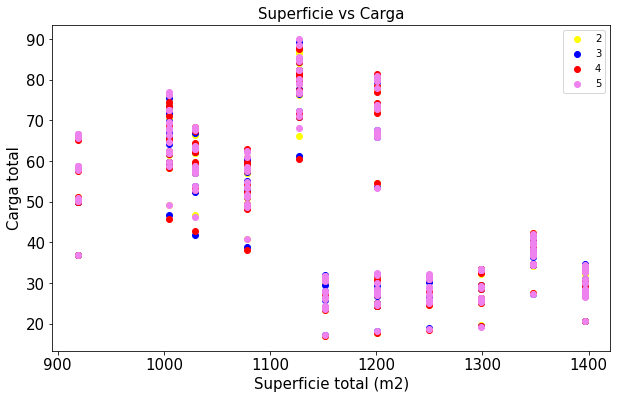

In [39]:
fig, axs = plt.subplots(figsize = (10,6))

for orientacion, color in zip(eficiencia_energetica['Orientation'].unique(), ['yellow', 'blue', 'red', 'violet']):
    filtro_orientacion = eficiencia_energetica[eficiencia_energetica['Orientation'].isin([orientacion])]
    axs.scatter(filtro_orientacion['superficieTotal'],filtro_orientacion['cargaTotal'], color = color, label = f'{orientacion}')
    
axs.set_title('Superficie vs Carga', fontsize = 15)
axs.set_xlabel('Superficie total (m2)', fontsize = 15)
axs.set_ylabel('Carga total', fontsize = 15)
axs.tick_params(labelsize = 15)
axs.legend()
plt.show()

## <span style='color:#55aa74'>2. Personas en situación de calle (obligatorio)</span>

Utilizando los datos dentro de *sinhogares.csv* se le pide.

- Un gráfico de barras verticales donde se muestre el valor medio de individuos en situación de calles separados por *región*. Agregue el desvío estándar a cada barra.

In [45]:
## TODO 2

sin_hogares = pd.read_csv('datasets/sinhogares.csv')
sin_hogares.head()

,Unnamed: 0,region,estado,individuos,miembrosFamilia,poblacionTotal
0,0,East South Central,Alabama,2570,864,4887681
1,1,Pacific,Alaska,1434,582,735139
2,2,Mountain,Arizona,7259,2606,7158024
3,3,West South Central,Arkansas,2280,432,3009733
4,4,Pacific,California,109008,20964,39461588


In [52]:
sin_hogares_media_region = sin_hogares.groupby('region')['individuos'].mean()
sin_hogares_media_region

region
East North Central     5081.200000
East South Central     3117.000000
Mid-Atlantic          18012.666667
Mountain               3561.375000
New England            2150.500000
Pacific               28427.200000
South Atlantic         5806.666667
West North Central     1995.857143
West South Central     6710.500000
Name: individuos, dtype: float64

In [51]:
sin_hogares_stdev_region = sin_hogares.groupby('region')['individuos'].std()
sin_hogares_stdev_region

region
East North Central     1830.780899
East South Central     2157.024648
Mid-Atlantic          18921.341399
Mountain               3143.438288
New England            2358.234658
Pacific               45428.961519
South Atlantic         6234.965998
West North Central     1371.731561
West South Central     8328.619113
Name: individuos, dtype: float64

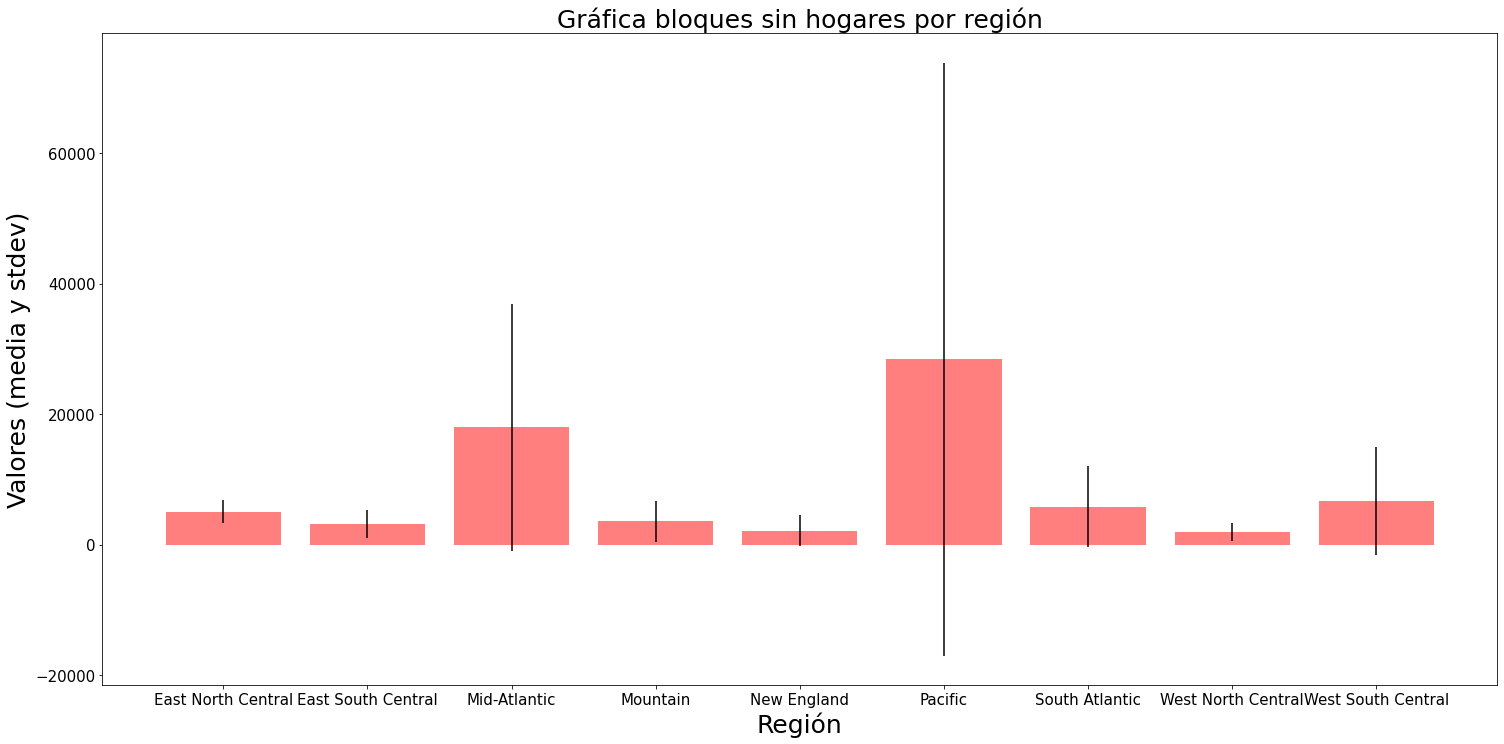

In [66]:
fig, axs = plt.subplots(figsize = (25,12))
axs.bar(sin_hogares_media_region.index,sin_hogares_media_region.values, yerr = sin_hogares_stdev_region.values,
        color = 'red', alpha = 0.5)
axs.set_title('Gráfica bloques sin hogares por región', fontsize = 25)
axs.set_xlabel('Región', fontsize = 25)
axs.set_ylabel('Valores (media y stdev)', fontsize = 25)
axs.tick_params(labelsize = 15)
plt.show()

## <span style='color:#55aa74'>3. Gráficas de ventas para Walmart (obligatorio)</span>

Utilizando los datos en *walmart.csv* realice lo siguiente.

- Un gráfico con 5 subplots diferentes en donde debe graficar las ventas semanales (a lo largo de todo el dataset) para los 5 departamentos con mayores ventas promedios.
- Un gráfico con las ventas semanales (a lo largo de todo el dataset) del departamento con mayor ventas semanales promedios. Agregue al gráfico **marcadores** en donde la columna *is_holiday* es igual a *True*. Puede agregar marcas a un gráfico del tipo `.plot()` usando el atributo `markevery`. Utilice [ésta](https://matplotlib.org/stable/gallery/lines_bars_and_markers/markevery_demo.html) referencia como ejemplo.

In [2]:
## TODO 3

walmart = pd.read_csv('datasets/walmart.csv')
walmart.head()

,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
0,1,A,1,2/5/2010,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,3/5/2010,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,4/2/2010,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,5/7/2010,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,6/4/2010,17558.09,False,27.050000,0.714586,7.808


In [3]:
ventas_semanales_pdepartamento = walmart.groupby('department')['weekly_sales'].mean().sort_values()[-5:]
ventas_semanales_pdepartamento

department
72     78807.015764
90     79860.514583
38     84868.739306
95    120029.480069
92    132316.960903
Name: weekly_sales, dtype: float64

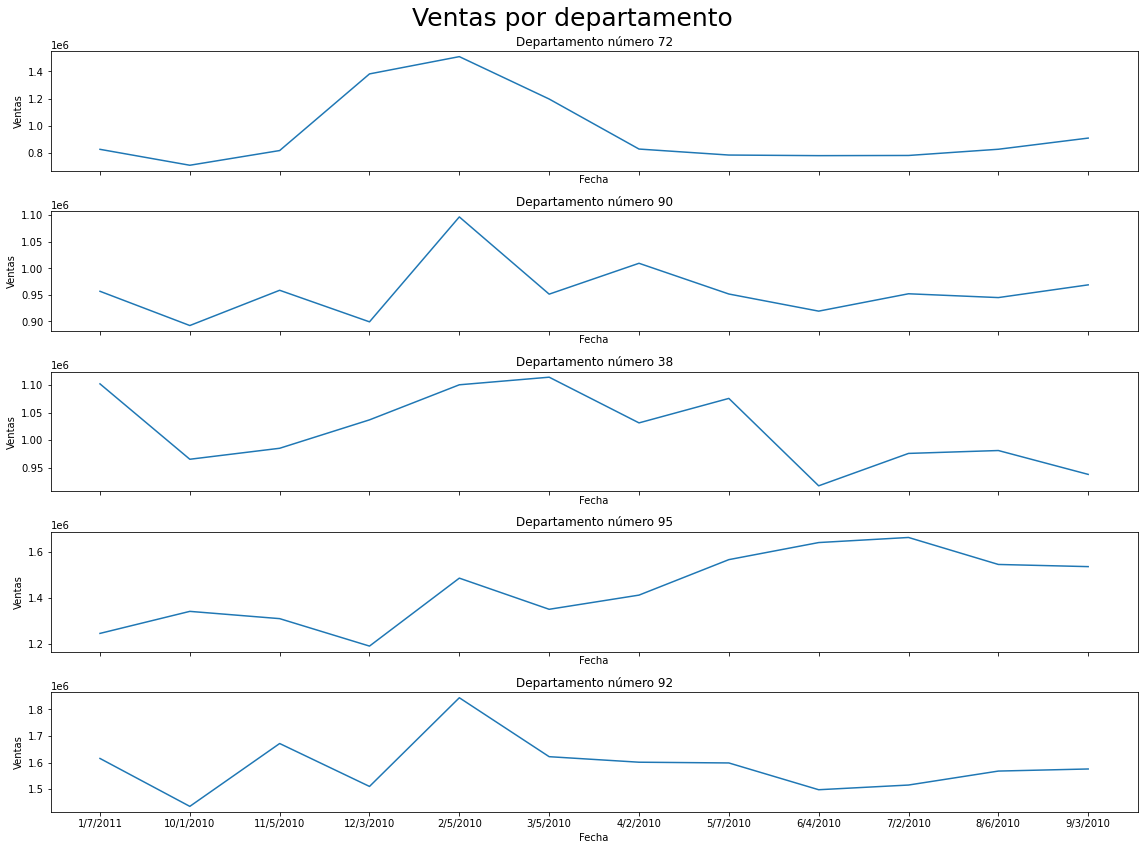

In [4]:
fig, axs = plt.subplots(5, figsize = (16, 12), sharex = True)

for i, departamento in enumerate(ventas_semanales_pdepartamento.index):
    por_departamento = walmart[walmart['department'].isin([departamento])].groupby('date')['weekly_sales'].sum()
    axs[i].plot(por_departamento.index, por_departamento.values)
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Ventas')
    axs[i].set_title(f'Departamento número {departamento}')

fig.suptitle('Ventas por departamento', fontsize = 25)
fig.tight_layout()
plt.show()

In [5]:
dto_mas_ventas = ventas_semanales_pdepartamento.index[-1]
dto_mas_ventas

92

In [6]:
dto_92 = walmart[walmart.isin({'department': [dto_mas_ventas]})['department']]
dto_92

,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
806,1,A,92,2/5/2010,139884.94,False,5.727778,0.679451,8.106
807,1,A,92,3/5/2010,132945.44,False,8.055556,0.693452,8.106
808,1,A,92,4/2/2010,126907.41,False,16.816667,0.718284,7.808
809,1,A,92,5/7/2010,132217.62,False,22.527778,0.748928,7.808
810,1,A,92,6/4/2010,126058.88,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10686,39,A,92,9/3/2010,103043.03,False,27.850000,0.680772,8.360
10687,39,A,92,10/1/2010,95209.15,False,22.633333,0.687640,8.476
10688,39,A,92,11/5/2010,102982.37,False,16.455556,0.710359,8.476
10689,39,A,92,12/3/2010,97304.18,False,11.972222,0.715378,8.476


In [7]:
dto_92.is_holiday.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

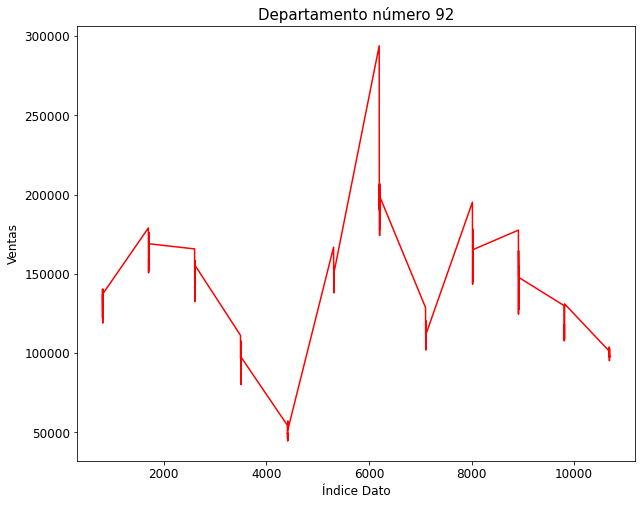

In [11]:
fig, axs = plt.subplots(figsize = (10,8))
axs.plot(dto_92['weekly_sales'].index, dto_92['weekly_sales'].values, markevery = dto_92.is_holiday.values, color = 'red')
axs.set_xlabel('Índice Dato', fontsize = 12)
axs.set_ylabel('Ventas', fontsize = 12)
axs.set_title(f'Departamento número {departamento}', fontsize = 15)
axs.tick_params(labelsize = 12)

## <span style='color:#55aa74'>4. Graficando datos del FIFA 2021(obligatorio)</span>

A partir de los datos en el set de datos *fifa2021.csv* realice,

- Un gráfico de barras horizontales con la cantidad de jugadores divididos por países.
- Histogramas (en un mismo gráfico) de las alturas (columna *height_cm*) para jugadores de Argentina, Uruguay, Alemania, Nigeria y Kosovo.

**¿Qué liga vale más dinero?**

- Realice un gráfico de barras verticales en donde se muestre el valor en euros de las ligas en la lista `ligas` en base a los precios de los jugadores que juegan en ella.

```python
ligas = ['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 'French Ligue 1', 'English Premier League', 'Holland Eredivisie', 'USA Major League Soccer', 'Chinese Super League', 'Saudi Abdul L. Jameel League', 'Turkish Süper Lig', 'Argentina Primera División', 'Uruguayan Primera División']
```

- Repita el ejercicio 5.1 de la *guía de ejercicios de Pandas*. Luego realice un gráfico de dispersión en donde se compare el precio de cada jugador con su *overall*. Discrimine los colores de los puntos en base a la columna *onePosition* obtenida luego de resolver la parte 5.1.

In [40]:
## TODO 4

fifa21 = pd.read_csv('datasets/fifa2021.csv')
fifa21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,6/24/1987,170,72,Argentina,FC Barcelona,...,NaN,35,24,6,11,15,14,8,89+3,89+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,2/5/1985,187,83,Portugal,Juventus,...,NaN,32,24,7,11,15,14,11,91+1,91+1
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,12,18,87,92,78,90,90,33+3,33+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,8/21/1988,184,80,Poland,FC Bayern München,...,NaN,42,19,15,6,12,8,10,89+2,89+2
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,NaN,30,29,9,9,15,15,11,84+3,84+3


In [41]:
fifa21.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 

In [42]:
conteos_nacionalidad = fifa21.groupby('nationality')['short_name'].count().sort_values()
conteos_nacionalidad

nationality
Nicaragua       1
Guam            1
Indonesia       1
Korea DPR       1
Macau           1
             ... 
Argentina     936
France        984
Spain        1072
Germany      1189
England      1685
Name: short_name, Length: 162, dtype: int64

Al ser tantos países el eje X va a quedar saturado por sus nombres, por lo tanto a continuación se mostrará el nombre de los países con menos jugadores, y luego con los de más.

In [43]:
conteos_nacionalidad.index

Index(['Nicaragua', 'Guam', 'Indonesia', 'Korea DPR', 'Macau', 'Malawi',
       'Bermuda', 'Malaysia', 'Malta', 'New Caledonia',
       ...
       'United States', 'Italy', 'Netherlands', 'Japan', 'Brazil', 'Argentina',
       'France', 'Spain', 'Germany', 'England'],
      dtype='object', name='nationality', length=162)

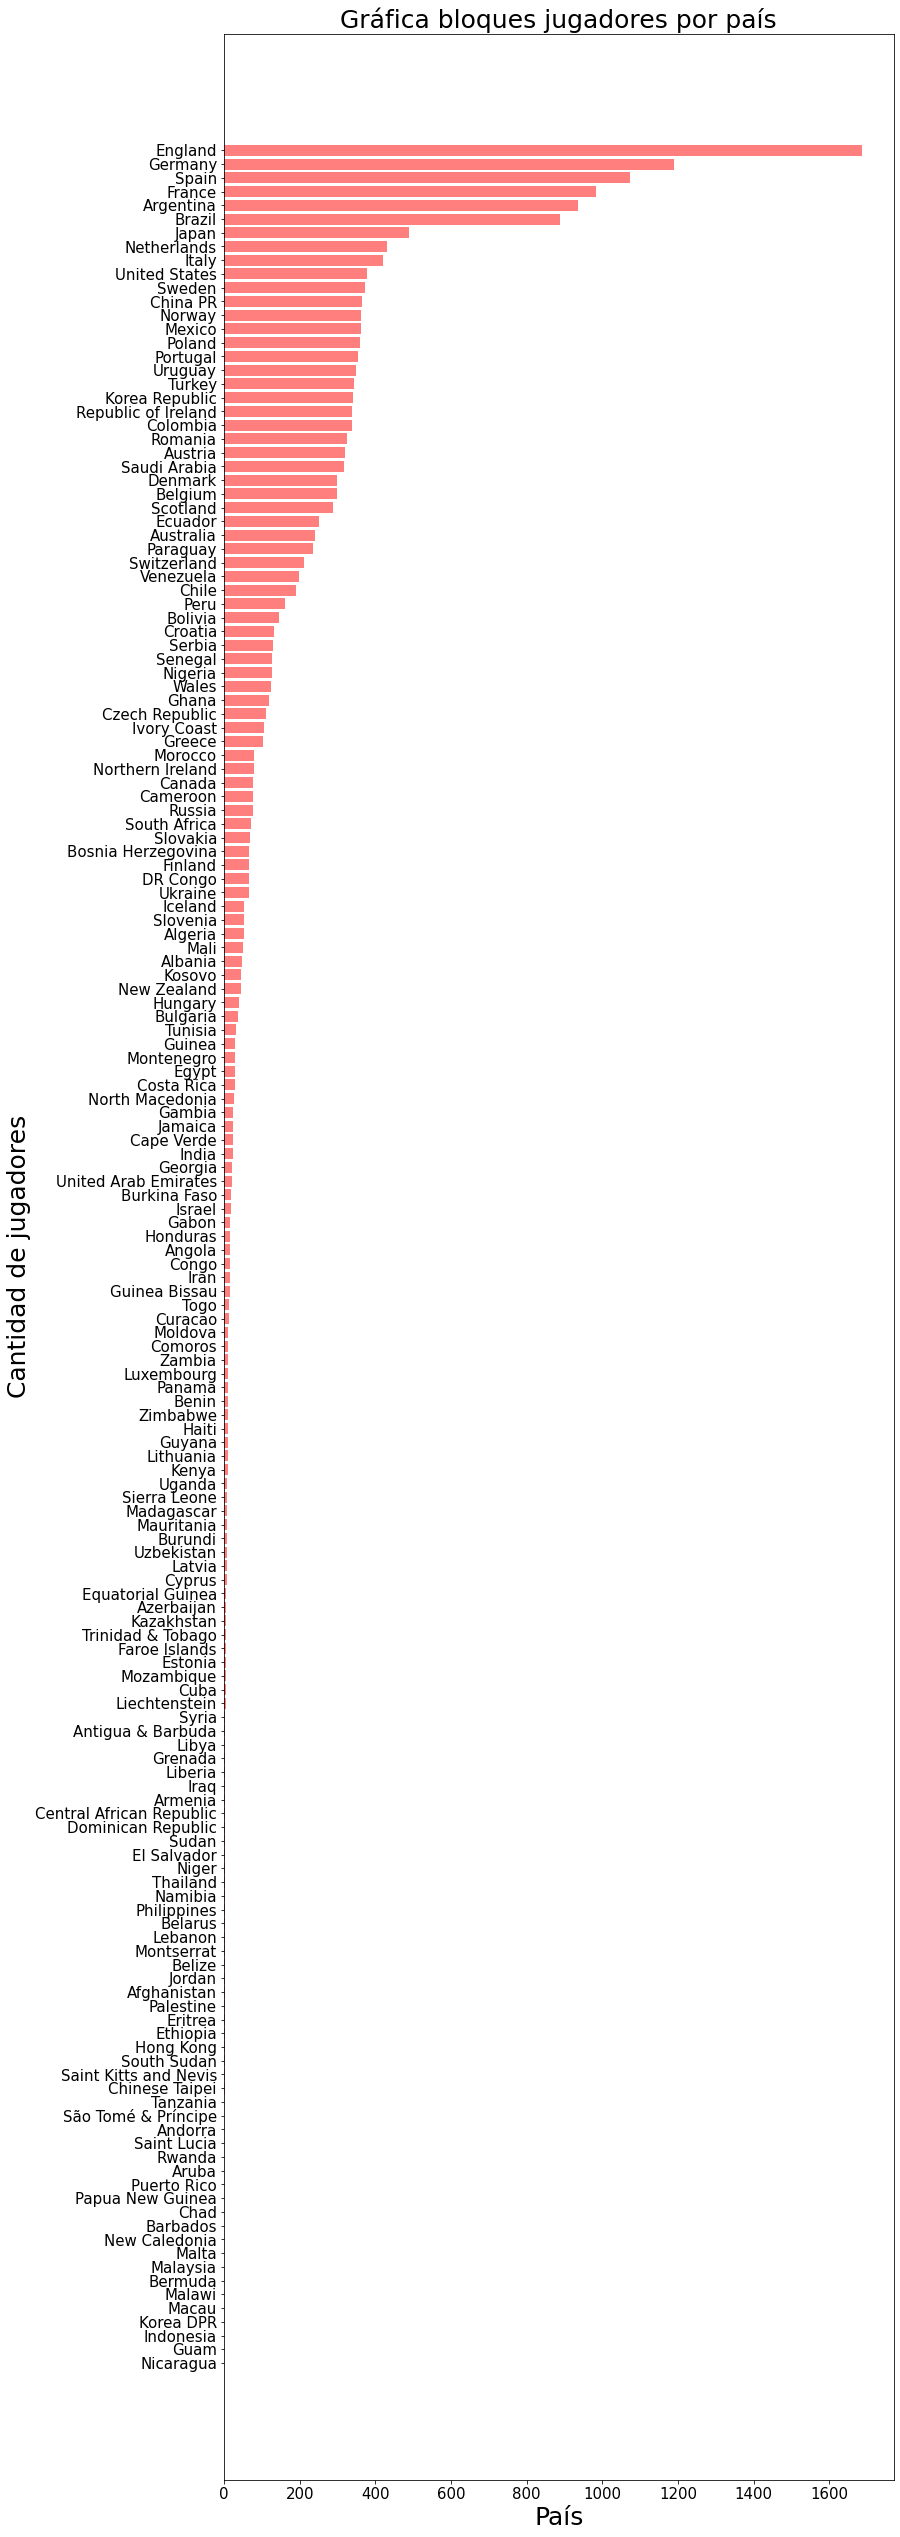

In [44]:
fig, axs = plt.subplots(figsize = (12,45))
axs.barh(conteos_nacionalidad.index, conteos_nacionalidad.values, color = 'red', alpha = 0.5)
axs.set_title('Gráfica bloques jugadores por país', fontsize = 25)
axs.set_xlabel('País', fontsize = 25)
axs.set_ylabel('Cantidad de jugadores', fontsize = 25)
axs.tick_params(labelsize = 15)
plt.show()

In [45]:
paises = ['Argentina', 'Uruguay', 'Alemania', 'Nigeria', 'Kosovo']
paises_filtrados = fifa21[fifa21.isin({'nationality': paises})['nationality']]
paises_filtrados

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,6/24/1987,170,72,Argentina,FC Barcelona,...,NaN,35,24,6,11,15,14,8,89+3,89+3
13,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,32,6/2/1988,173,70,Argentina,Manchester City,...,NaN,29,24,13,15,6,11,14,87+2,87+2
22,211110,https://sofifa.com/player/211110/paulo-dybala/...,P. Dybala,Paulo Bruno Exequiel Dybala,26,11/15/1993,177,75,Argentina,Juventus,...,NaN,48,40,5,4,4,5,8,83+3,83+3
37,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,33,1/24/1987,182,86,Uruguay,FC Barcelona,...,NaN,45,38,27,25,31,33,37,86+1,86+1
39,183898,https://sofifa.com/player/183898/angel-di-mari...,A. Di María,Ángel Fabián Di María Hernández,32,2/14/1988,180,69,Argentina,Paris Saint-Germain,...,NaN,55,52,10,7,11,12,11,79+3,79+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18467,257692,https://sofifa.com/player/257692/alban-ajdini/...,A. Ajdini,Alban Ajdini,20,7/9/1999,179,67,Kosovo,Servette FC,...,NaN,28,25,7,11,9,8,8,51+2,51+2
18480,255806,https://sofifa.com/player/255806/julio-recoba/...,J. Recoba,Julio César Recoba Serena,23,4/3/1997,178,75,Uruguay,Centro Atlético Fénix,...,NaN,43,53,11,7,15,13,12,45+2,45+2
18483,258288,https://sofifa.com/player/258288/williams-barl...,W. Barlasina,Williams Barlasina,22,6/29/1998,184,74,Argentina,Newell's Old Boys,...,NaN,12,8,54,52,47,50,56,17+2,17+2
18612,255809,https://sofifa.com/player/255809/bruno-scorza/...,B. Scorza,Bruno Scorza Perdomo,19,10/1/2000,176,72,Uruguay,Centro Atlético Fénix,...,NaN,19,10,7,11,7,12,13,51+2,51+2


In [46]:
paises_filtrados.sort_values('nationality')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,6/24/1987,170,72,Argentina,FC Barcelona,...,NaN,35,24,6,11,15,14,8,89+3,89+3
7200,217201,https://sofifa.com/player/217201/enrique-trive...,E. Triverio,Enrique Luis Triverio,31,12/31/1988,183,82,Argentina,Deportivo Toluca,...,NaN,21,26,8,11,16,9,10,68+0,68+0
7205,219918,https://sofifa.com/player/219918/osvaldo-cabra...,O. Cabral,Osvaldo Ramón Cabral,35,6/4/1985,186,82,Argentina,River Plate Asunción,...,NaN,17,13,68,70,63,65,71,28+2,28+2
15811,255093,https://sofifa.com/player/255093/tomas-oneto/2...,T. Oneto,Tomás Alexis Oneto,22,2/19/1998,185,78,Argentina,SD Aucas,...,NaN,59,57,7,6,14,8,10,42+2,42+2
7257,232697,https://sofifa.com/player/232697/lautaro-gemin...,L. Geminiani,Lautaro Dante Geminiani,29,3/2/1991,178,74,Argentina,Patronato,...,NaN,66,67,14,8,12,14,13,52+2,52+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,253237,https://sofifa.com/player/253237/ayrton-cougo/...,A. Cougo,Carlos Ayrton Cougo Rivero,24,6/15/1996,180,73,Uruguay,Nacional de Montevideo,...,NaN,56,58,7,8,10,9,9,60+2,60+2
8903,254075,https://sofifa.com/player/254075/leandro-suhr/...,L. Suhr,Leandro Suhr Avondet,22,9/24/1997,175,81,Uruguay,Club Plaza Colonia,...,NaN,28,22,15,10,13,12,12,65+2,65+2
8964,235280,https://sofifa.com/player/235280/jose-aja/210002,J. Aja,José Manuel Aja Livchich,27,5/10/1993,193,84,Uruguay,Minnesota United FC,...,NaN,68,63,6,8,8,10,7,48+2,48+2
8664,253718,https://sofifa.com/player/253718/juan-ramirez/...,J. Ramírez,Juan Ignacio Ramírez Polero,23,2/1/1997,179,76,Uruguay,Liverpool Fútbol Club,...,NaN,16,17,7,12,13,9,6,66+2,66+2


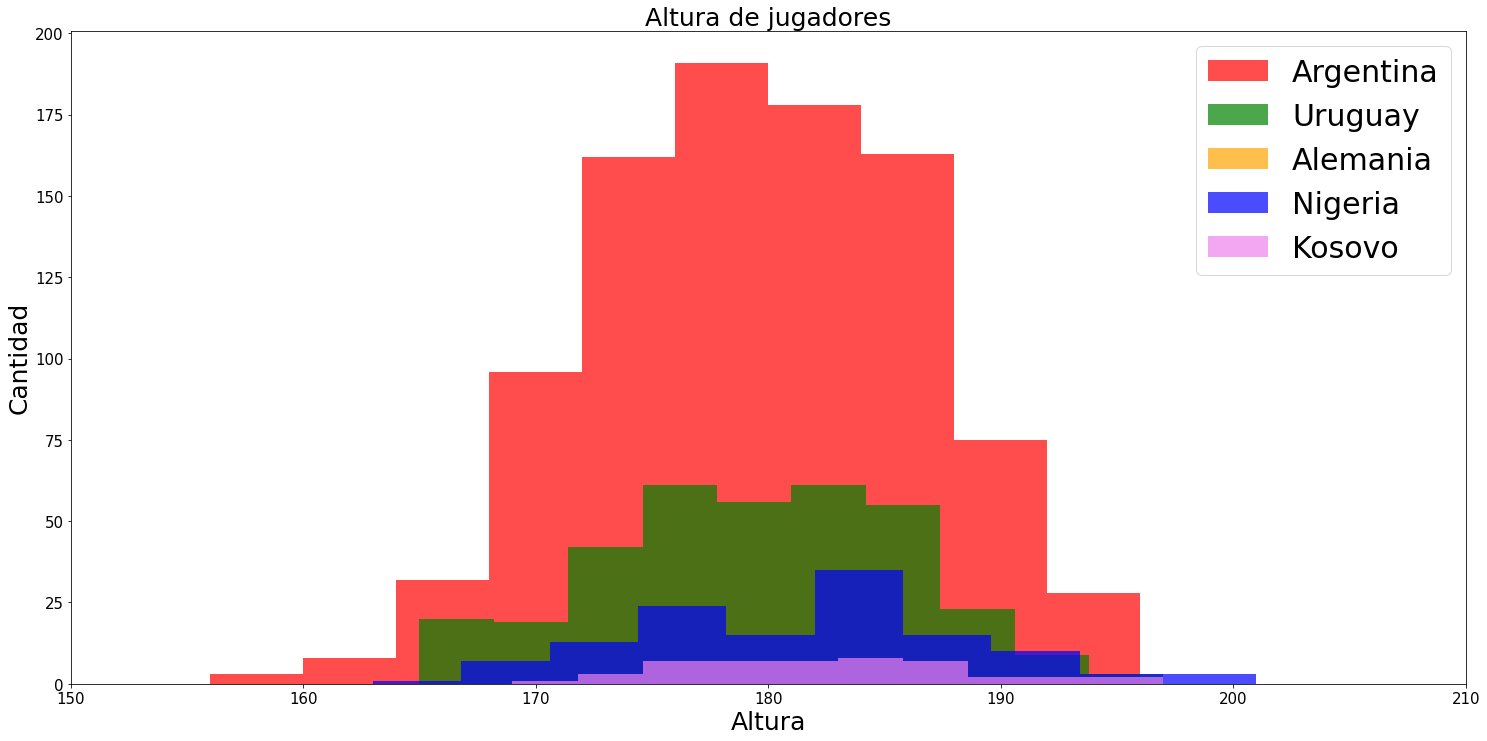

In [51]:
colores = {'Argentina': 'red', 
           'Uruguay': 'green',
          'Alemania': 'orange',
          'Nigeria': 'blue',
          'Kosovo': 'violet'}

fig, axs = plt.subplots(figsize = (25,12))

for pais in colores.keys():
    
    axs.hist(fifa21[fifa21.isin({'nationality': [pais]})['nationality']]['height_cm'], color = colores[pais], alpha = 0.7, label = pais)
    
axs.set_title('Altura de jugadores', fontsize = 25)
axs.set_xlabel('Altura', fontsize = 25)
axs.set_ylabel('Cantidad', fontsize = 25)
axs.tick_params(labelsize = 15)
axs.set_xlim([150, 210])
axs.legend(fontsize = 30)
plt.show()

In [48]:
ligas = ['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 
         'French Ligue 1', 'English Premier League', 'Holland Eredivisie', 
         'USA Major League Soccer', 'Chinese Super League', 'Saudi Abdul L. Jameel League', 
         'Turkish Süper Lig', 'Argentina Primera División', 'Uruguayan Primera División']

filtrado_ligas = fifa21[fifa21.isin({'league_name': ligas})['league_name']]
euros_ligas = filtrado_ligas.groupby('league_name')['value_eur'].sum().sort_values()
euros_ligas

league_name
Uruguayan Primera División       159135000
Saudi Abdul L. Jameel League     447355000
Chinese Super League             600108000
Holland Eredivisie              1055095000
USA Major League Soccer         1075825000
Turkish Süper Lig               1086000000
Argentina Primera División      1229370000
French Ligue 1                  2948835000
German 1. Bundesliga            3858735000
Italian Serie A                 3984970000
Spain Primera Division          5266865000
English Premier League          6444575000
Name: value_eur, dtype: int64

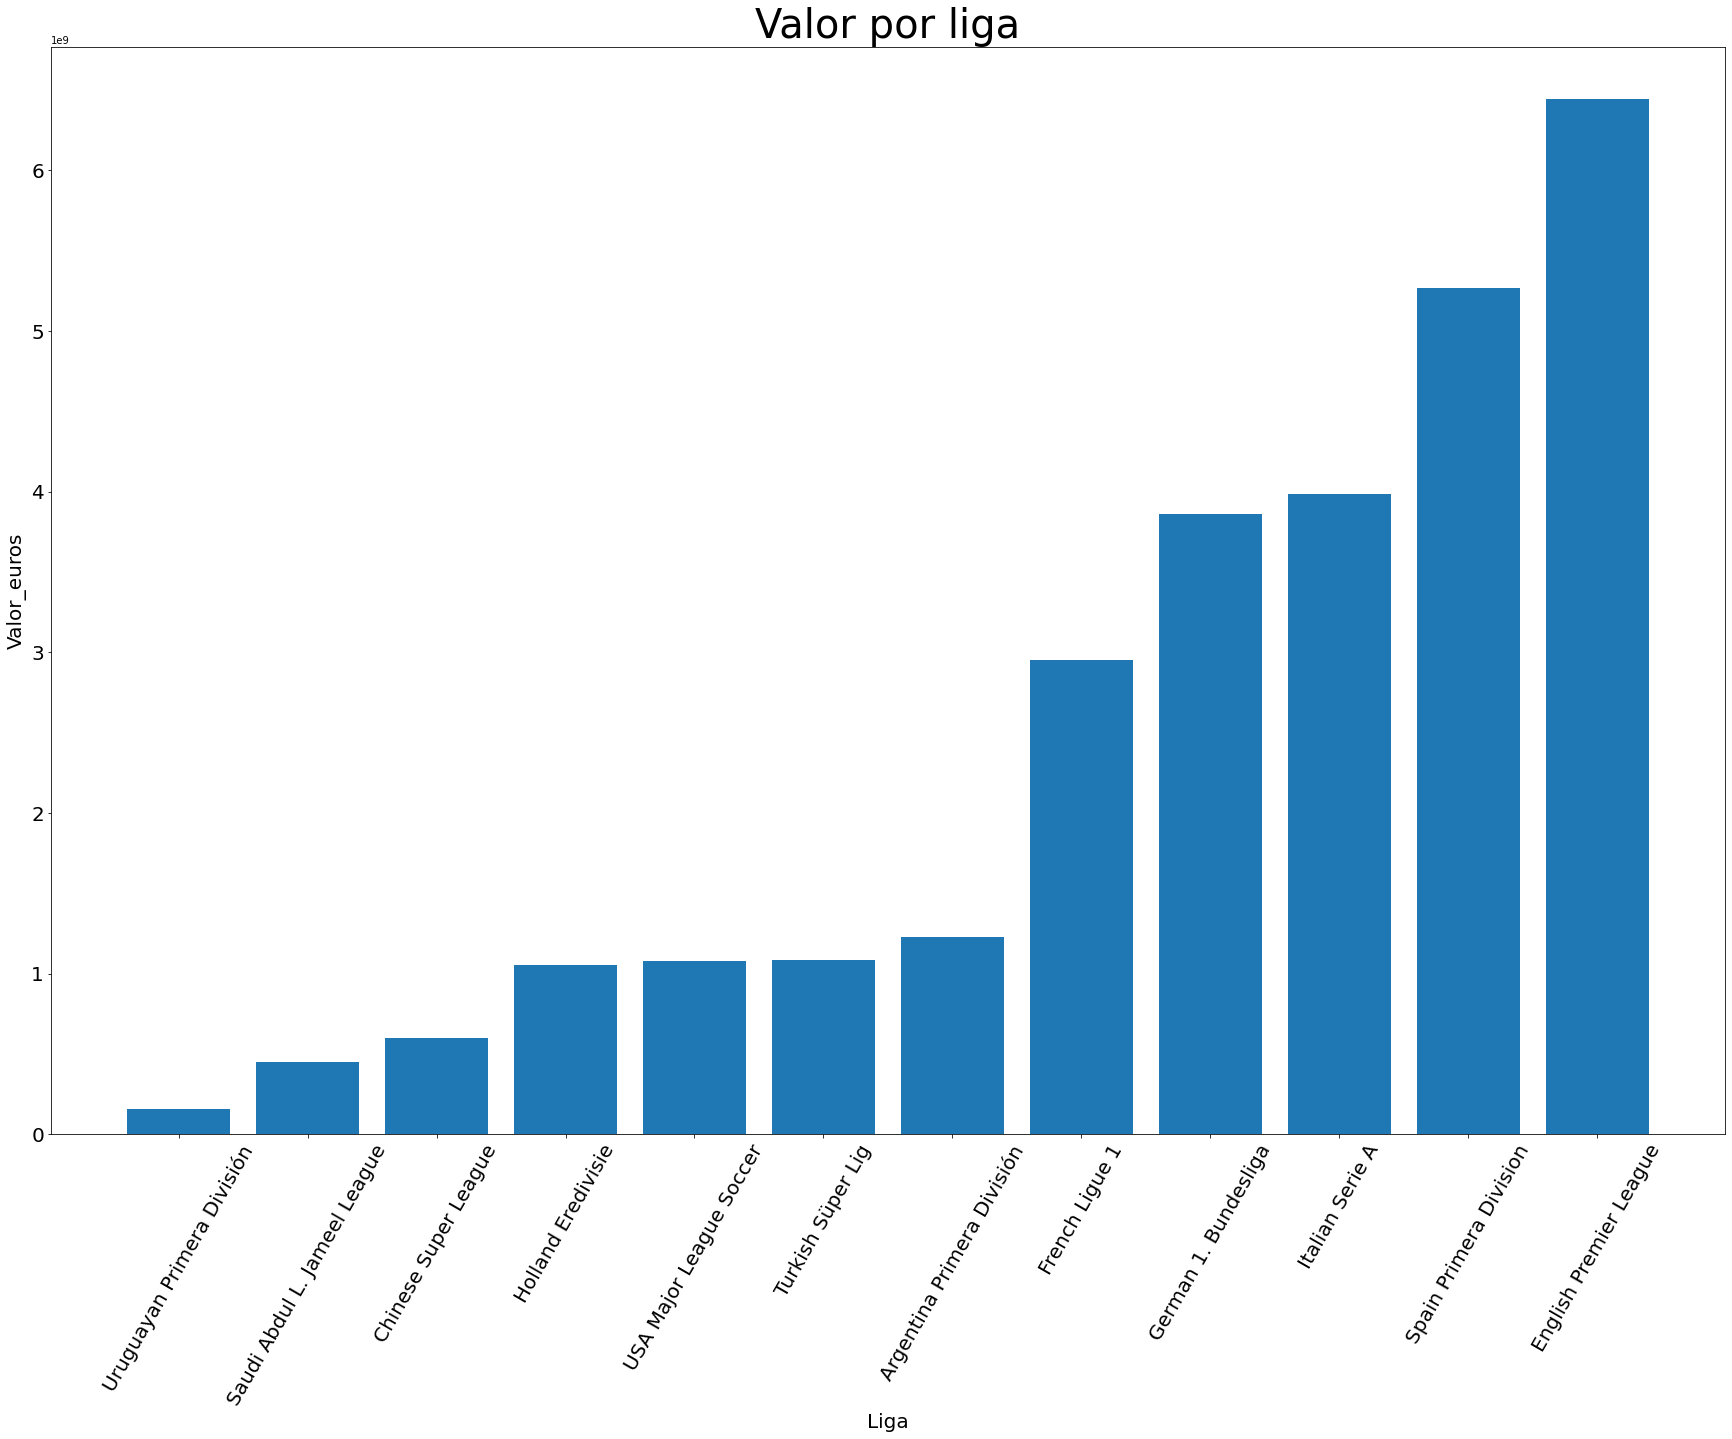

In [27]:
fig, axs = plt.subplots(figsize = (30,20))

axs.bar(euros_ligas.index, euros_ligas.values)
axs.set_title('Valor por liga', fontsize = 40)
axs.set_xlabel('Liga', fontsize = 20)
axs.set_ylabel('Valor_euros', fontsize = 20)
axs.tick_params(labelsize = 20)
axs.tick_params(axis = 'x', rotation = 60)
plt.show()

In [54]:
onePositions = []

posiciones = {'Atacante': ['ST','CF','RW','LW'],
             'Mediocampista': ['LM','RM','CM','CDM','CAM',"RWB"],
             'Defensor': ['LB','RB','CB','LWB'],
             'Arquero': ['GK']}

def cambiar_posicion(posiciones_dataframe):
    try:
        for i in posicion.split(','):
            for a in posiciones.keys():
                if i in posiciones[a]:
                    return a
                    
    except:
        for a in posiciones.keys():
            if posiciones_dataframe in posiciones[a]:
                return a
                

for posicion in fifa21['player_positions'].values:
    cambio = cambiar_posicion(posicion)
    onePositions.append(cambio)

fifa21_cambiado = fifa21.drop('player_positions', axis = 1, inplace = False)
fifa21_cambiado['onePosition'] = onePositions

In [55]:
fifa21_cambiado['onePosition']

0             Atacante
1             Atacante
2              Arquero
3             Atacante
4             Atacante
             ...      
18939    Mediocampista
18940         Defensor
18941         Defensor
18942    Mediocampista
18943    Mediocampista
Name: onePosition, Length: 18944, dtype: object

In [56]:
fifa21_cambiado["onePosition"] = fifa21_cambiado["onePosition"].map({"Atacante": 0, "Defensor":1, "Mediocampista": 2, "Arquero": 3})
fifa21_cambiado['onePosition']                                                       

0        0
1        0
2        3
3        0
4        0
        ..
18939    2
18940    1
18941    1
18942    2
18943    2
Name: onePosition, Length: 18944, dtype: int64

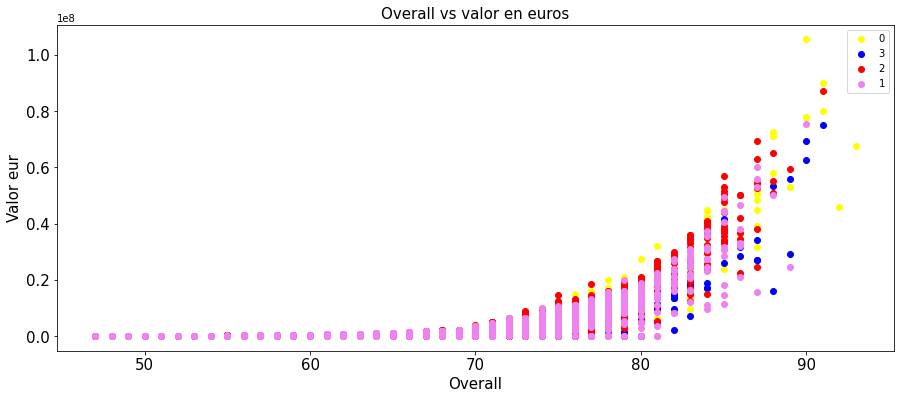

In [62]:
fig, axs = plt.subplots(figsize = (15,6))

for posicion, color in zip(fifa21_cambiado["onePosition"].unique(), ['yellow', 'blue', 'red', 'violet']):
    filtro_orientacion = fifa21_cambiado[fifa21_cambiado.isin({"onePosition": [posicion]})['onePosition']]
    axs.scatter(filtro_orientacion['overall'],filtro_orientacion['value_eur'], color = color, label = f'{posicion}')
    
axs.set_title('Overall vs valor en euros', fontsize = 15)
axs.set_xlabel('Overall', fontsize = 15)
axs.set_ylabel('Valor euros', fontsize = 15)
axs.tick_params(labelsize = 15)
axs.legend()
plt.show()

OTRA MANERA DE HACERLO (pero sin legend)

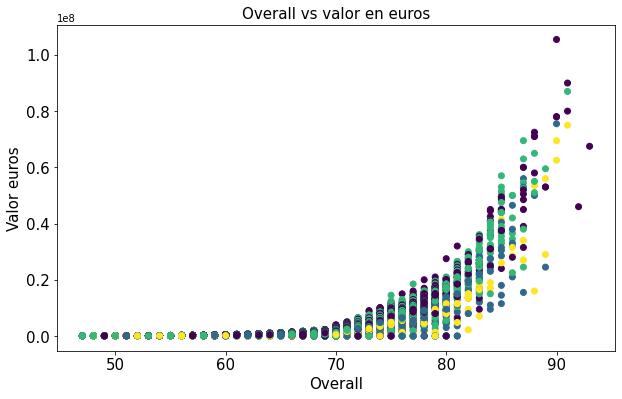

In [61]:
fig, axs = plt.subplots(figsize = (10,6))
axs.scatter(fifa21_cambiado['overall'].values,fifa21_cambiado['value_eur'].values, c = fifa21_cambiado.onePosition)
axs.set_title('Overall vs valor en euros', fontsize = 15)
axs.set_xlabel('Overall', fontsize = 15)
axs.set_ylabel('Valor euros', fontsize = 15)
axs.tick_params(labelsize = 15)
plt.show()

<hr style="border:1px solid #2C3E50"> </hr>

### FIN